In [1]:
import geopandas as gpd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mapclassify

import geoplot

In [ ]:
SHP = '/home/rdora/declaranet/data/shape/mg_sep2019_integrado/conjunto_de_datos/00ent.shp'
gdf = gpd.read_file(SHP)

In [5]:
CNTS = '/home/rdora/declaranet/data/pre-process/contratos_2.csv'
cnts = pd.read_csv(CNTS)

/home/rdora/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
gdf.columns = gdf.columns.str.lower()

In [7]:
# Number of contracts
# By buyer
gb_buyer = cnts.groupby('buyer_state').id.count().reset_index().rename(columns={
    'buyer_state': 'nomgeo', 'id': 'buyer_contracts'})
gdf = pd.merge(gdf, gb_buyer, on='nomgeo')

# Number of contracts
# By Supplier
gb_seller = cnts.groupby('supplier_state').id.count().reset_index().rename(columns={
    'supplier_state': 'nomgeo', 'id': 'supplier_contracts'})
gdf = pd.merge(gdf, gb_seller, on='nomgeo')

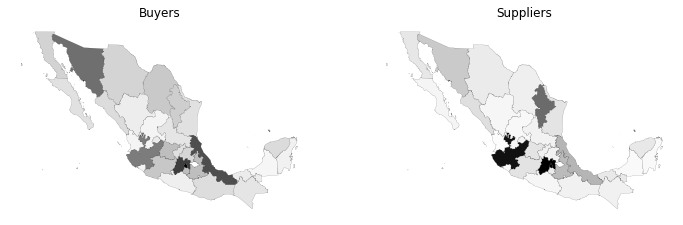

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# fig.suptitle('Number of contracts per state', fontsize=16)

gdf.plot('supplier_contracts',
         vmax=100000,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title("Suppliers")

gdf.plot('buyer_contracts',
         vmax=100000,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title("Buyers");

In [62]:
# Buyer / Supplier ratio
gb_buyer = pd.merge(gb_buyer, gb_seller, how='left')

gb_buyer['ratio'] = gb_buyer['buyer_contracts'] / gb_buyer['supplier_contracts']

gdf = pd.merge(gdf, gb_buyer[['nomgeo', 'ratio']], how='left')

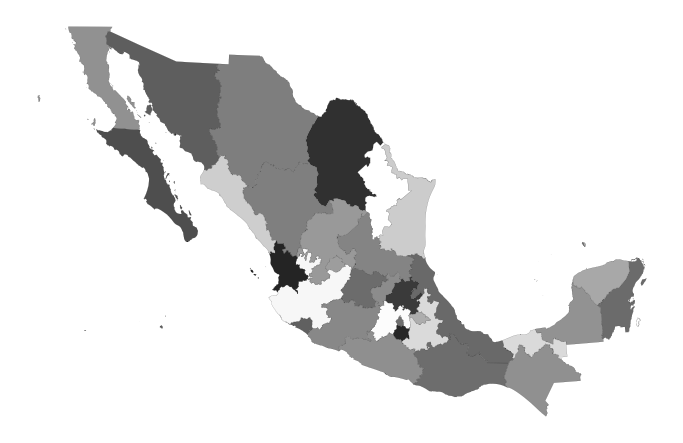

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('ratio',
         vmax=2.5,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_axis_off()

In [ ]:
# Supplier in their own state
gb_same = cnts.loc[
    cnts.supplier_state == cnts.buyer_state].groupby('buyer_state').id.count().rename('same_state').reset_index()
gb_same.columns = ['nomgeo', 'same_state']
gb_same = pd.merge(gb_same, gb_buyer, how='left')

gb_same['same_state_ratio'] = gb_same['same_state'] / gb_same['buyer_contracts']

gdf = pd.merge(gdf, gb_same[['nomgeo', 'same_state_ratio']], how='left')

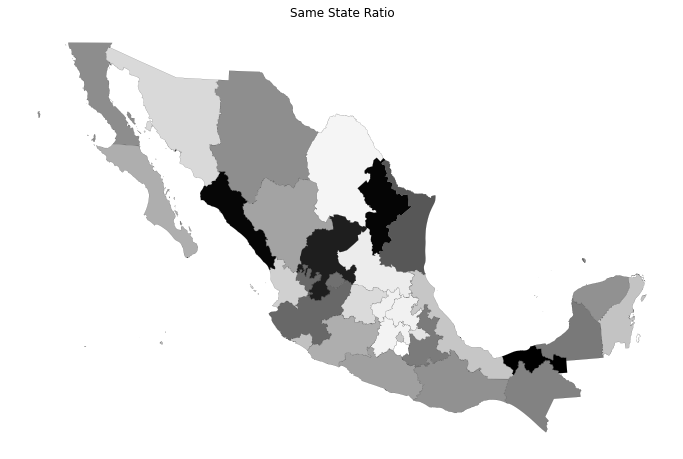

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('same_state_ratio',
         vmax=0.6,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_title("Same State Ratio")
ax.set_axis_off()

In [109]:
# Single bidding ratio
gb_bid = cnts.groupby('buyer_state').single_bid.mean().reset_index()
gb_bid.columns = ['nomgeo', 'single_bid_ratio']
gdf = pd.merge(gdf, gb_bid, how='left')

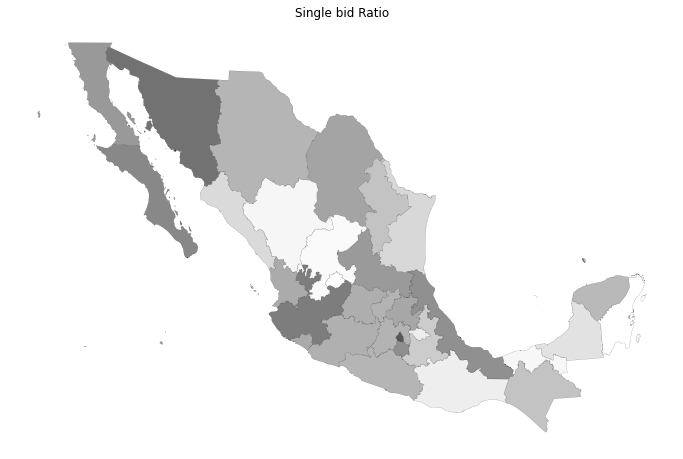

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('single_bid_ratio',
         vmax=1,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_title("Single bid Ratio")
ax.set_axis_off()

In [112]:
cnts.columns

Index(['id', 'start_date', 'amount', 'supplier', 'ramo', 'desc_ramo', 'person',
       'buyer', 'file_size', 'single_bid', 'contract_duration', 'prop_window',
       'daily_price', 'contract_type', 'gvmnt_level', 'buyer_state',
       'supplier_state', 'supplier_country'],
      dtype='object')

In [113]:
# Mean number of contract per file
gb_bid = cnts.groupby('buyer_state').file_size.mean().reset_index()
gb_bid.columns = ['nomgeo', 'mean_file_size']
gdf = pd.merge(gdf, gb_bid, how='left')

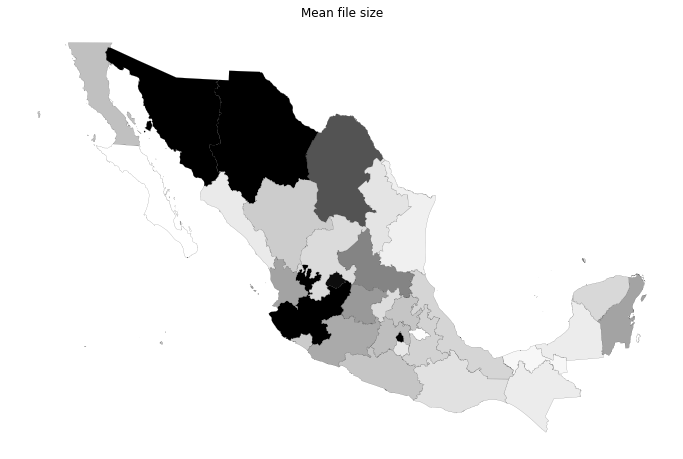

In [121]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('mean_file_size',
         cmap='Greys',
         vmax=8.5,
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_title("Mean file size")
ax.set_axis_off()

In [129]:
cnts.loc[cnts.daily_price==np.inf, 'daily_price'] = (
    cnts.loc[cnts.daily_price==np.inf, 'amount'])

In [132]:
# Mean daily price per contract
gb_bid = cnts.groupby('buyer_state').daily_price.mean().reset_index()
gb_bid.columns = ['nomgeo', 'mean_daily_price']
gdf = pd.merge(gdf, gb_bid, how='left')

In [134]:
gb_bid.mean_daily_price.quantile(.9)

4583.363936830927

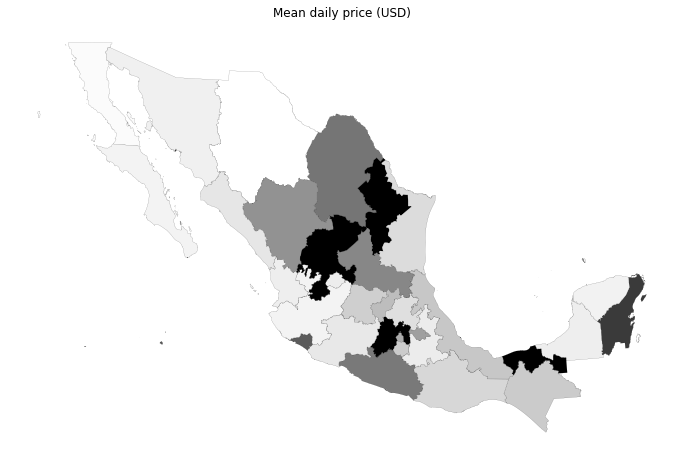

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('mean_daily_price',
         vmax=4500,
         cmap='Greys',
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_title("Mean daily price (USD)")
ax.set_axis_off()

In [138]:
cnts.columns

Index(['id', 'start_date', 'amount', 'supplier', 'ramo', 'desc_ramo', 'person',
       'buyer', 'file_size', 'single_bid', 'contract_duration', 'prop_window',
       'daily_price', 'contract_type', 'gvmnt_level', 'buyer_state',
       'supplier_state', 'supplier_country'],
      dtype='object')

In [139]:
# Mean bidding period
gb_bid = cnts.groupby('buyer_state').prop_window.mean().reset_index()
gb_bid.columns = ['nomgeo', 'mean_bidding_period']
gdf = pd.merge(gdf, gb_bid, how='left')

In [140]:
gb_bid.mean_bidding_period.quantile(.9)

14.59725839284885

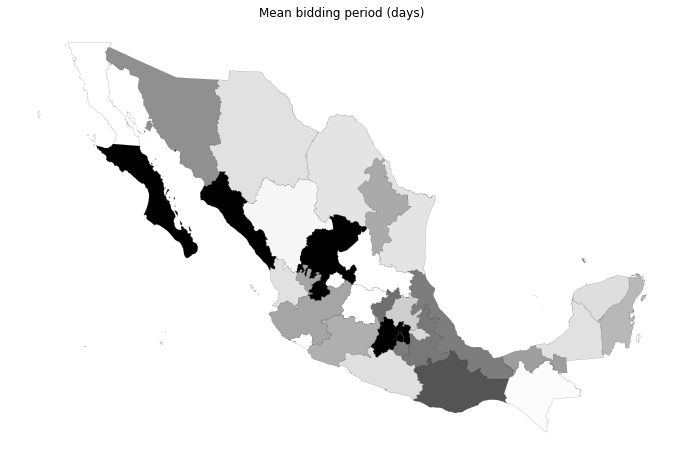

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot('mean_bidding_period',
         cmap='Greys_r',
         vmin=0,
         vmax=14.5,
         alpha=1,
         edgecolor='black',
         linewidth=0.1,
         k=10,
         ax=ax)
ax.set_title("Mean bidding period (days)")
ax.set_axis_off()